In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from datetime import date

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Preprocessing
# Load the dataset using Python (Pandas/NumPy)
# Read Data from CSV file
gld_price_data=pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')
gld_price_data_df=pd.DataFrame(gld_price_data)
print("Head")
print(gld_price_data_df.head())
print("Info")
print(gld_price_data_df.info())
#Handle missing values
print("IsNull")
#print(gld_price_data_df.isnull())
gld_price_data_df.fillna(0)
# remov outlier

#standardize features as appropriate
features = ['SPX', 'USO', 'SLV', 'EUR/USD']
scaler=StandardScaler()
scaled_data=scaler.fit_transform(gld_price_data_df[features])
scaled_data=pd.DataFrame(scaled_data,columns=features)
#scaled_data['Date']=gld_price_data_df['Date']
scaled_data['GLD']=gld_price_data_df['GLD']
print("Scaled Data Head")
scaled_data.head()

Head
         Date          SPX        GLD        USO     SLV   EUR/USD
0  01/02/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  01/03/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  01/04/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  01/07/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  01/08/2008  1390.189941  86.779999  76.059998  15.590  1.557099
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None
IsNull
Scaled Data Head


,SPX,USO,SLV,EUR/USD,GLD
0,-0.399145,2.388810,-0.691720,1.429753,84.860001
1,-0.399145,2.383687,-0.676912,1.451035,85.570000
2,-0.467604,2.329381,-0.693553,1.458646,85.129997
3,-0.458837,2.236652,-0.709630,1.403954,84.769997
4,-0.508915,2.265342,-0.633900,2.079145,86.779999


                SPX           USO           SLV       EUR/USD          GLD
count  2.290000e+03  2.290000e+03  2.290000e+03  2.290000e+03  2290.000000
mean  -9.928981e-17 -2.482245e-16  2.730470e-16 -9.928981e-17   122.732875
std    1.000218e+00  1.000218e+00  1.000218e+00  1.000218e+00    23.283346
min   -1.883987e+00 -1.223521e+00 -1.584398e+00 -1.859861e+00    70.000000
25%   -7.985400e-01 -8.946152e-01 -6.367205e-01 -8.541769e-01   109.725000
50%   -1.982296e-01  1.038860e-01 -3.971922e-01  1.493588e-01   120.580002
75%    8.067356e-01  3.066347e-01  3.945136e-01  6.563161e-01   132.840004
max    2.347897e+00  4.387349e+00  3.832313e+00  2.396203e+00   184.589996


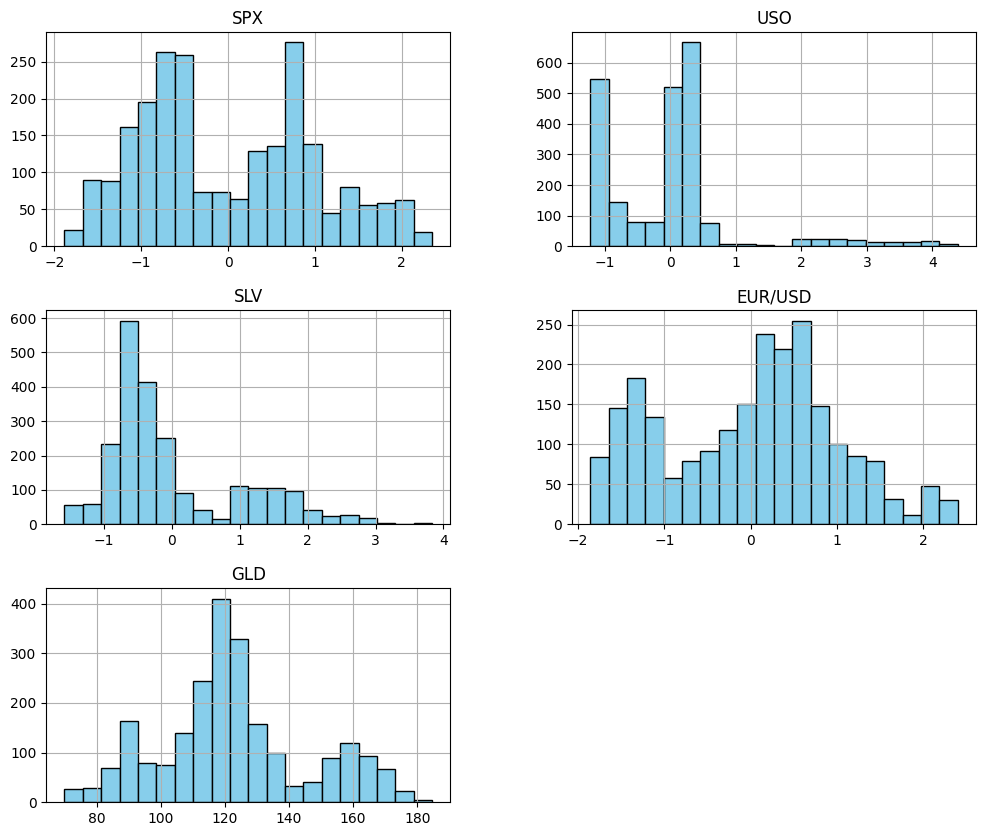

Correlation Matrix
              SPX       USO       SLV   EUR/USD       GLD
SPX      1.000000 -0.591573 -0.274055 -0.672017  0.049345
USO     -0.591573  1.000000  0.167547  0.829317 -0.186360
SLV     -0.274055  0.167547  1.000000  0.321631  0.866632
EUR/USD -0.672017  0.829317  0.321631  1.000000 -0.024375
GLD      0.049345 -0.186360  0.866632 -0.024375  1.000000
GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


In [ ]:
 # Exploratory Data Analysis (EDA)
print(scaled_data.describe())

# Visualize distributions of features
scaled_data.hist(bins=20, color='skyblue', edgecolor='black',figsize=(12, 10))
plt.show()

# Analyze correlations between features and the target variable
correlation_matrix = scaled_data.corr()
print("Correlation Matrix")
print(correlation_matrix)

print(scaled_data.corr()['GLD'].sort_values(ascending=False))

Mean Squared Error: 137.78692615505608
Mean Aesolute Error: 9.396253898514068
R-squared: 0.774601499384218


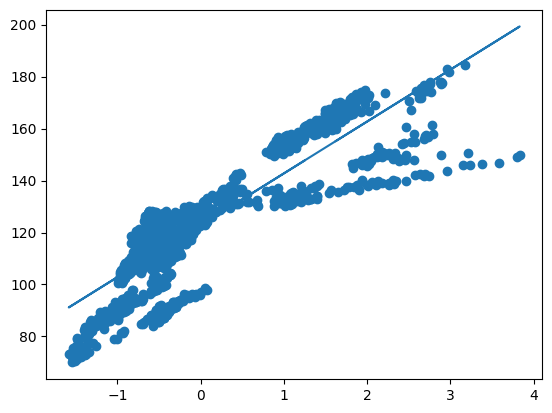

In [ ]:
# Regression Task
# Linear Regression
x=scaled_data['SLV']
y=scaled_data['GLD']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Train a simple linear regression model.
# Calculat slope,intercept,r_value,p_value and correlation coefficients
slope,intercept,r_value,p_value,std_err=stats.linregress(x_train,y_train)

# Creat 'myfunc' function to calculat new value
def myfunc(x_myfunc):
  return slope * x_myfunc + intercept

# Applay 'myfunc' function on x_train to calculat
mymodel=list(map(myfunc,x_train))

# Evaluate model performance using R-squared and Mean Squared Error
y_pred=myfunc(x_test)
mse=mean_squared_error(y_train,mymodel)
mae = mean_absolute_error(y_train,mymodel)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Aesolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the regression line
plt.scatter(x_train,y_train)
plt.plot(x_train,mymodel)
plt.show()

Mean Squared Error: 96.1751702162257
Mean Aesolute Error: 7.471687928140548
R-squared: 0.8245938564342543


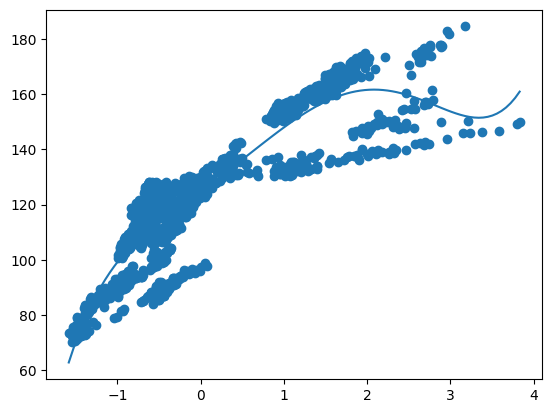

In [ ]:
# Polynomial Regression
# Find the equation of the curve that represents the relationship between X_train and X_train,y_train
p=np.polyfit(x_train,y_train,5)
# Create a polynomial object called mymodel and  takes the output of the polyfit
mymodel=np.poly1d(p)
# Predict 'GLD' values based on X_test
y_pred=mymodel(x_test)

# Generateing the x-values for plotting the polynomial curve
# It contains 100 evenly spaced values between min(X_train) and max(X_train) , providing a smooth range for the curve
# calculating the corresponding y-coordinates for each point in X_new
X_new=np.linspace(min(x_train),max(x_train),100)
y_new=mymodel(X_new)

# Evaluate model performance using R-squared and Mean Squared Error
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_poly=r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Aesolute Error: {mae}')
print(f'R-squared: {r2_poly}')

# Plot the regression line
plt.scatter(x_train,y_train)
plt.plot(X_new,y_new)
plt.show()

In [ ]:
# RandomForestRegressor
features = ['SLV','SPX','EUR/USD']
x=scaled_data[features]
y=scaled_data['GLD']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Cteata Random Forest Regressor object
rr=RandomForestRegressor(n_estimators=150,random_state=42)
# Train Random Forest Regressor model
rr.fit(x_train,y_train)
# Tist Random Forest Regressor model
y_pred=rr.predict(x_test)

# Evaluate model performance using R-squared and Mean Squared Error
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_poly=r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Aesolute Error: {mae}')
print(f'R-squared: {r2_poly}')


Mean Squared Error: 7.898225270561439
Mean Aesolute Error: 1.3905085130858832
R-squared: 0.9855950633348713


In [ ]:
# Copy scaled data to scaled data classifier
scaled_data_classifier=scaled_data.copy()
# Mean of GLD
mean_gld=np.mean(scaled_data_classifier['GLD'])
print(f'Mean of GLD: {mean_gld}')
# Stander diviation of GLD
std_gld=np.std(scaled_data_classifier['GLD'])
print(f'Stander diviation of GLD: {std_gld}')

# Creat gld_Classification to Classifier GLD
def gld_classification(GLD_col):
  if GLD_col > mean_gld + std_gld:
    return 'High'
  elif GLD_col < mean_gld - std_gld:
    return 'Low'
  else:
    return 'Medium'

# Applay 'gld_classification' on GLD
scaled_data_classifier['GLD_Category']=scaled_data_classifier['GLD'].apply(gld_classification)
pd.set_option('display.max_columns',None)
scaled_data_classifier

Mean of GLD: 122.73287507292576
Stander diviation of GLD: 23.278261492062462


,SPX,USO,SLV,EUR/USD,GLD,GLD_Category
0,-0.399145,2.388810,-0.691720,1.429753,84.860001,Low
1,-0.399145,2.383687,-0.676912,1.451035,85.570000,Low
2,-0.467604,2.329381,-0.693553,1.458646,85.129997,Low
3,-0.458837,2.236652,-0.709630,1.403954,84.769997,Low
4,-0.508915,2.265342,-0.633900,2.079145,86.779999,Low
...,...,...,...,...,...,...
2285,1.960708,-0.911009,-0.645182,-0.736505,124.589996,Medium
2286,2.010555,-0.895128,-0.642361,-0.752222,124.330002,Medium
2287,2.059264,-0.893078,-0.612747,-0.698761,125.180000,Medium
2288,2.072867,-0.894615,-0.638131,-0.688383,124.489998,Medium


Accuracy: 0.9847161572052402
Precision: 0.984715774151536
Recall: 0.9847161572052402
F1 Score: 0.9847070573968745


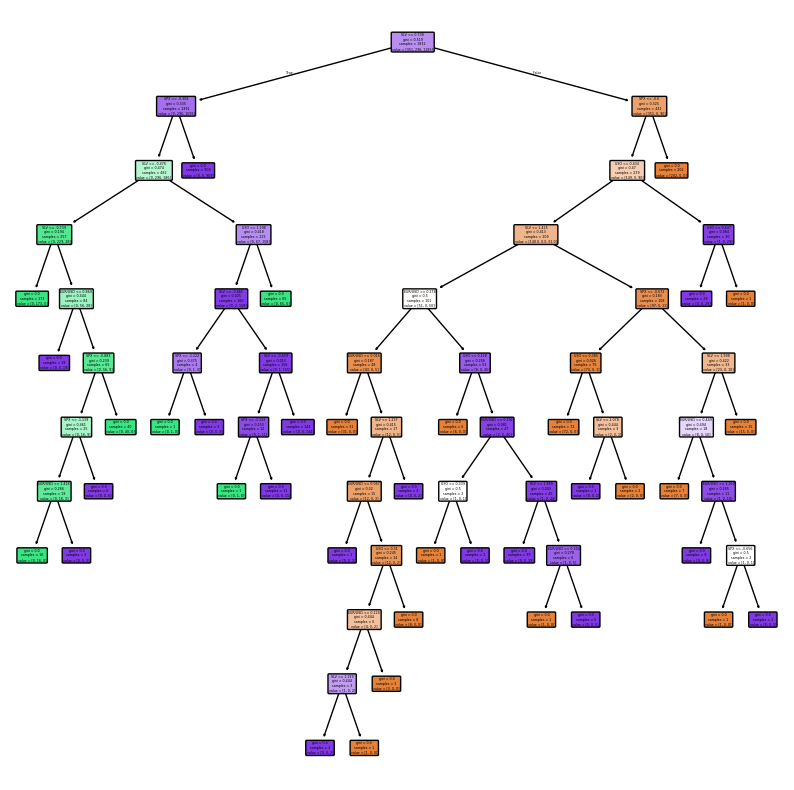

In [ ]:
features = ['SLV','SPX', 'EUR/USD','USO']
x=scaled_data_classifier[features]
y=scaled_data_classifier['GLD_Category']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Decision Tree Classifier
# Create decision tree classifier object
myModel_classifier=DecisionTreeClassifier()
# Train a decision tree classifier
myModel_classifier.fit(x_train,y_train)

# Predict 'GLD_Category' values based on X_test
y_pred=myModel_classifier.predict(x_test)

# Evaluate models using Accuracy, Precision, Recall, and F1 Score
accuracy_decision_tree=accuracy_score(y_test,y_pred)
precision_decision_tree=precision_score(y_test,y_pred,average='weighted')
recall_decision_tree=recall_score(y_test,y_pred,average='weighted')
f1_score_decision_tree=f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy: {accuracy_decision_tree}')
print(f'Precision: {precision_decision_tree}')
print(f'Recall: {recall_decision_tree}')
print(f'F1 Score: {f1_score_decision_tree}')


plt.figure(figsize=(10, 10))
plot_tree(myModel_classifier, filled=True, feature_names=features ,rounded=True)
plt.show()

In [ ]:
# Logistic Regression
# Creat Logistic Regression models
myModel_logistic=LogisticRegression(max_iter=10000, random_state=0)
# Train Logistic Regression models
myModel_logistic.fit(x_train,y_train)
# Tist Logistic Regression models
y_pred=myModel_logistic.predict(x_test)

# Evaluate models using Accuracy, Precision, Recall, and F1 Score
accuracy_logistic=accuracy_score(y_test,y_pred)
precision_logistic=precision_score(y_test,y_pred,average='weighted')
recall_logistic=recall_score(y_test,y_pred,average='weighted')
f1_score_logistic=f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy: {accuracy_logistic}')
print(f'Precision: {precision_logistic}')
print(f'Recall: {recall_logistic}')
print(f'F1 Score: {f1_score_logistic}')


Accuracy: 0.9497816593886463
Precision: 0.952262772075174
Recall: 0.9497816593886463
F1 Score: 0.9505590665757415


In [ ]:
# RandomForestClassifier
# Cteata Random Forest Classifier object
rn=RandomForestClassifier(n_estimators=120, random_state=42)
# Train Random Forest Classifier models
rn.fit(x_train,y_train)
# Tist Random Forest Classifier models
y_pred=rn.predict(x_test)

# Evaluate models using Accuracy, Precision, Recall, and F1 Score
accuracy_random_forest=accuracy_score(y_test,y_pred)
precision_random_forest=precision_score(y_test,y_pred,average='weighted')
recall_random_forest=recall_score(y_test,y_pred,average='weighted')
f1_score_random_forest=f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy: {accuracy_random_forest}')
print(f'Precision: {precision_random_forest}')
print(f'Recall: {recall_random_forest}')
print(f'F1 Score: {f1_score_random_forest}')


Accuracy: 0.982532751091703
Precision: 0.9828505668920214
Recall: 0.982532751091703
F1 Score: 0.9825978377716389


0.9847161572052402